In [1]:
import pandas as pd
import numpy as np

from langchain_community.document_loaders import YoutubeLoader
from youtube_transcript_api import YouTubeTranscriptApi
from pytube import Playlist

# Youtube Data Scraping

In [2]:
test_url = "https://www.youtube.com/watch?v=Mz8-LTednt4&list=PLofp2YXfp7TZZ5c7HEChs0_wfEfewLDs7"

loader = YoutubeLoader.from_youtube_url(test_url)
transcript = loader.load()

In [3]:
transcript

[Document(page_content="[Music] thank you hi my name is Greg durat I'm really excited to introduce you to my course natural language processing I'm an assistant professor in the department of computer science here at UT Austin and I've been working in the field of natural language processing for about 12 years now and it's been a really exciting 12 years and we've seen a progression all the way from linear models uh things like classifiers up through the latest and greatest systems like Chachi BT so if you've played around with Chachi PT you know that it can do things like this we can ask a question like how many years after the start of the Revolutionary War did George Washington step down as president and the system will do its computation and it will produce this answer that has to look up these two dates and take the difference between them and figure out this number of years so Chachi BT is a large neural network language model but what's a language model what kind of neural netwo

## Transcrição de um curso de NLP

In [4]:
nlp_playlist = Playlist("https://www.youtube.com/playlist?list=PLofp2YXfp7TZZ5c7HEChs0_wfEfewLDs7")

In [5]:
len(nlp_playlist.video_urls)

98

In [6]:
nlp_course_transcripts = []

for video_url in nlp_playlist.video_urls:
    # print(video_url)
    video_loader = YoutubeLoader.from_youtube_url(video_url)
    video_transcript = video_loader.load()

    nlp_course_transcripts.append(video_transcript[0])


In [7]:
nlp_course_transcripts

[Document(page_content="[Music] thank you hi my name is Greg durat I'm really excited to introduce you to my course natural language processing I'm an assistant professor in the department of computer science here at UT Austin and I've been working in the field of natural language processing for about 12 years now and it's been a really exciting 12 years and we've seen a progression all the way from linear models uh things like classifiers up through the latest and greatest systems like Chachi BT so if you've played around with Chachi PT you know that it can do things like this we can ask a question like how many years after the start of the Revolutionary War did George Washington step down as president and the system will do its computation and it will produce this answer that has to look up these two dates and take the difference between them and figure out this number of years so Chachi BT is a large neural network language model but what's a language model what kind of neural netwo

## Transcrição de um Curso de Teoria da Computação

In [13]:
cs_theory_url = "https://www.youtube.com/playlist?list=PLm3J0oaFux3ZYpFLwwrlv_EHH9wtH6pnX"

In [14]:
cs_theory_playlist = Playlist(cs_theory_url)

In [15]:
len(cs_theory_playlist)

110

In [16]:
cs_theory_transcripts = []

for video_url in cs_theory_playlist.video_urls:
    # print(video_url)
    video_loader = YoutubeLoader.from_youtube_url(video_url)
    video_transcript = video_loader.load()

    # print(video_transcript)

    if not video_transcript:
        continue

    cs_theory_transcripts.append(video_transcript[0])


In [17]:
cs_theory_transcripts

[Document(page_content="welcome to 15 751 I suppose we prefer this title TCS toolkit my name is Ryan O'Donnell you can call me Ryan and his lecture one is the only lecturer which has slides which is nice because you can see we could not control the lights correctly and it's very bright on the screen but that'll be good when we're using the blackboard which we'll be doing in all subsequent lectures well be you know proving Sterling's formula and stuff on the blackboard but today in this lecture its signature luxury let it lecture so I'm just gonna like tell you some stuff about the course hopefully you can read the screen ok so today's lecture will be divided into three parts part one and I'll tell you just some stuff about the course and then oops part two I'll tell you how to TCS and in part three we'll talk about street-fighting mathematics so it'll be a little bit math at the end of this lecture okay so let's dive right in I'll start by telling you about the course and you know what

In [18]:
nlp_course_transcripts[0].page_content

"[Music] thank you hi my name is Greg durat I'm really excited to introduce you to my course natural language processing I'm an assistant professor in the department of computer science here at UT Austin and I've been working in the field of natural language processing for about 12 years now and it's been a really exciting 12 years and we've seen a progression all the way from linear models uh things like classifiers up through the latest and greatest systems like Chachi BT so if you've played around with Chachi PT you know that it can do things like this we can ask a question like how many years after the start of the Revolutionary War did George Washington step down as president and the system will do its computation and it will produce this answer that has to look up these two dates and take the difference between them and figure out this number of years so Chachi BT is a large neural network language model but what's a language model what kind of neural network is being used here w

In [19]:
cs_theory_transcripts[0].page_content

"welcome to 15 751 I suppose we prefer this title TCS toolkit my name is Ryan O'Donnell you can call me Ryan and his lecture one is the only lecturer which has slides which is nice because you can see we could not control the lights correctly and it's very bright on the screen but that'll be good when we're using the blackboard which we'll be doing in all subsequent lectures well be you know proving Sterling's formula and stuff on the blackboard but today in this lecture its signature luxury let it lecture so I'm just gonna like tell you some stuff about the course hopefully you can read the screen ok so today's lecture will be divided into three parts part one and I'll tell you just some stuff about the course and then oops part two I'll tell you how to TCS and in part three we'll talk about street-fighting mathematics so it'll be a little bit math at the end of this lecture okay so let's dive right in I'll start by telling you about the course and you know what we're gonna do in the 

In [20]:
np.mean([len(t.page_content) for t in nlp_course_transcripts])

8036.622448979592

In [21]:
np.mean([len(t.page_content) for t in cs_theory_transcripts])

22071.5871559633

# Embedding

In [22]:
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from dotenv import load_dotenv
import os

load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [23]:
embedding_size = 1024
embedding_model = "text-embedding-3-small"
embeddings = OpenAIEmbeddings(model=embedding_model, dimensions=embedding_size)

In [24]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=500,
    length_function=len,
    is_separator_regex=False,
)

In [25]:
nlp_chunks = text_splitter.split_documents(nlp_course_transcripts)
cs_theory_chunks = text_splitter.split_documents(cs_theory_transcripts)

In [26]:
nlp_embeddings = np.array(embeddings.embed_documents([chunk.page_content for chunk in nlp_chunks]))
cs_embeddings = np.array(embeddings.embed_documents([chunk.page_content for chunk in cs_theory_chunks]))

In [27]:
nlp_embeddings

array([[-0.01747688, -0.00596334,  0.0323505 , ..., -0.0323505 ,
         0.0387855 ,  0.00395606],
       [ 0.00384601,  0.02023843, -0.00394154, ..., -0.02280008,
         0.00653503,  0.00516221],
       [-0.01835858,  0.02080639,  0.02186528, ..., -0.01348359,
         0.05363181, -0.00238249],
       ...,
       [ 0.04120168,  0.03338476, -0.01041442, ..., -0.04100626,
         0.0281572 , -0.01683895],
       [ 0.04499371,  0.03227453,  0.05284871, ..., -0.05215852,
         0.01587433, -0.06099951],
       [ 0.04200813,  0.04408563,  0.05706996, ..., -0.04909605,
         0.02888632, -0.0479962 ]])

In [28]:
nlp_embeddings.shape

(537, 1024)

In [29]:
all_vectors = np.concatenate([nlp_embeddings, cs_embeddings], axis=0)

In [30]:
nlp_embeddings.shape, cs_embeddings.shape, all_vectors.shape

((537, 1024), (1621, 1024), (2158, 1024))

## Visualizar Embeddings

In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
all_vectors_tsne = tsne.fit_transform(all_vectors)

c:\Users\jonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jonas\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


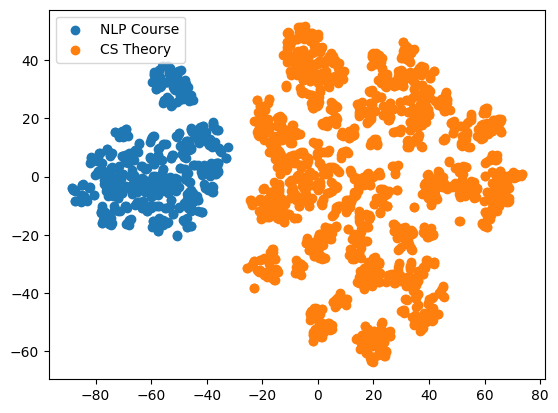

In [32]:
import matplotlib.pyplot as plt

plt.scatter(all_vectors_tsne[:len(nlp_embeddings), 0], all_vectors_tsne[:len(nlp_embeddings), 1], label="NLP Course")
plt.scatter(all_vectors_tsne[len(nlp_embeddings):, 0], all_vectors_tsne[len(nlp_embeddings):, 1], label="CS Theory")
plt.legend()
plt.show()

# Modelo de Classificação

In [34]:
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split

class Classifier(nn.Module):
    def __init__(self, 
                 input_size, 
                 hidden_size, 
                 output_size):
        
        super(Classifier, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)

        # print(out)
        # print(out.shape)

        return out
    
input_size = embedding_size
criterion = nn.CrossEntropyLoss()
classifier = Classifier(input_size, 100, 2)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

X = torch.tensor(all_vectors, dtype=torch.float32)
y = torch.tensor([0]*len(nlp_embeddings) + [1]*len(cs_embeddings), dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
y_train.shape

torch.Size([1726])

In [36]:
classifier

Classifier(
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [37]:
from tqdm import tqdm

for epoch in tqdm(range(100)):

    optimizer.zero_grad()
    outputs = classifier(X_train)
    # loss = criterion(outputs.squeeze(1), y_train.to(torch.float32))
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch} Loss: {loss.item()}")

 16%|█▌        | 16/100 [00:00<00:00, 159.16it/s]

Epoch 0 Loss: 0.686926543712616
Epoch 1 Loss: 0.6775022149085999
Epoch 2 Loss: 0.6688109636306763
Epoch 3 Loss: 0.660183310508728
Epoch 4 Loss: 0.6511101126670837
Epoch 5 Loss: 0.6415942311286926
Epoch 6 Loss: 0.6317020058631897
Epoch 7 Loss: 0.6215692162513733
Epoch 8 Loss: 0.6113398671150208
Epoch 9 Loss: 0.6010866761207581
Epoch 10 Loss: 0.5908772349357605
Epoch 11 Loss: 0.580787718296051
Epoch 12 Loss: 0.5708993673324585
Epoch 13 Loss: 0.5612822771072388
Epoch 14 Loss: 0.5519810318946838
Epoch 15 Loss: 0.5430375337600708
Epoch 16 Loss: 0.5344750881195068
Epoch 17 Loss: 0.5262957215309143
Epoch 18 Loss: 0.518460214138031
Epoch 19 Loss: 0.5109170079231262
Epoch 20 Loss: 0.5036114454269409
Epoch 21 Loss: 0.49649176001548767
Epoch 22 Loss: 0.48951125144958496
Epoch 23 Loss: 0.4826275408267975
Epoch 24 Loss: 0.4758051037788391
Epoch 25 Loss: 0.4690207540988922
Epoch 26 Loss: 0.4622635245323181
Epoch 27 Loss: 0.4555366635322571
Epoch 28 Loss: 0.44885948300361633
Epoch 29 Loss: 0.44226494

 51%|█████     | 51/100 [00:00<00:00, 163.52it/s]

Epoch 33 Loss: 0.4176523983478546
Epoch 34 Loss: 0.41215407848358154
Epoch 35 Loss: 0.40696585178375244
Epoch 36 Loss: 0.4020874798297882
Epoch 37 Loss: 0.39750584959983826
Epoch 38 Loss: 0.393202006816864
Epoch 39 Loss: 0.38915395736694336
Epoch 40 Loss: 0.385336697101593
Epoch 41 Loss: 0.3817296624183655
Epoch 42 Loss: 0.3783169388771057
Epoch 43 Loss: 0.37509047985076904
Epoch 44 Loss: 0.3720460534095764
Epoch 45 Loss: 0.36917784810066223
Epoch 46 Loss: 0.36648011207580566
Epoch 47 Loss: 0.3639465272426605
Epoch 48 Loss: 0.3615703582763672
Epoch 49 Loss: 0.35934314131736755
Epoch 50 Loss: 0.3572556972503662
Epoch 51 Loss: 0.3552982807159424
Epoch 52 Loss: 0.3534606695175171
Epoch 53 Loss: 0.3517334461212158
Epoch 54 Loss: 0.3501072824001312
Epoch 55 Loss: 0.34857410192489624
Epoch 56 Loss: 0.3471270203590393
Epoch 57 Loss: 0.34576016664505005
Epoch 58 Loss: 0.3444681763648987
Epoch 59 Loss: 0.34324660897254944
Epoch 60 Loss: 0.3420915901660919
Epoch 61 Loss: 0.34099963307380676
Epoc

 85%|████████▌ | 85/100 [00:00<00:00, 139.24it/s]

Epoch 66 Loss: 0.33636990189552307
Epoch 67 Loss: 0.3355875611305237
Epoch 68 Loss: 0.3348458707332611
Epoch 69 Loss: 0.33414193987846375
Epoch 70 Loss: 0.3334730863571167
Epoch 71 Loss: 0.33283695578575134
Epoch 72 Loss: 0.33223146200180054
Epoch 73 Loss: 0.3316546082496643
Epoch 74 Loss: 0.33110466599464417
Epoch 75 Loss: 0.33058005571365356
Epoch 76 Loss: 0.3300792872905731
Epoch 77 Loss: 0.3296010494232178
Epoch 78 Loss: 0.32914409041404724
Epoch 79 Loss: 0.32870733737945557
Epoch 80 Loss: 0.32828953862190247
Epoch 81 Loss: 0.32788971066474915
Epoch 82 Loss: 0.3275068700313568
Epoch 83 Loss: 0.3271399736404419
Epoch 84 Loss: 0.3267882168292999
Epoch 85 Loss: 0.3264507055282593
Epoch 86 Loss: 0.3261265456676483
Epoch 87 Loss: 0.3258151113986969
Epoch 88 Loss: 0.32551565766334534
Epoch 89 Loss: 0.3252274692058563
Epoch 90 Loss: 0.32495003938674927
Epoch 91 Loss: 0.3246828317642212


100%|██████████| 100/100 [00:00<00:00, 153.16it/s]

Epoch 92 Loss: 0.32442522048950195
Epoch 93 Loss: 0.3241768181324005
Epoch 94 Loss: 0.3239371180534363
Epoch 95 Loss: 0.3237057626247406
Epoch 96 Loss: 0.3234822750091553
Epoch 97 Loss: 0.3232663869857788
Epoch 98 Loss: 0.323057621717453
Epoch 99 Loss: 0.32285577058792114


In [38]:
from sklearn.metrics import accuracy_score, classification_report

outputs_test = classifier(X_test)
_, predicted = torch.max(outputs_test, 1)

print(accuracy_score(y_test, predicted))

0.9930555555555556


In [39]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.99      1.00      1.00       322

    accuracy                           0.99       432
   macro avg       1.00      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



## Entropia

In [40]:
def shannon_entropy(p):
    return -np.sum(p * np.log2(p))

all_outputs = classifier(X)
entropy = np.array([shannon_entropy(x) for x in all_outputs.detach().numpy()])
all_chunks = np.array([x.page_content for x in (nlp_chunks + cs_theory_chunks)])

df = pd.DataFrame({"entropy": entropy, 
                   "text": all_chunks, 
                   "label": y.numpy()})

In [63]:
df.sort_values("entropy", ascending=False).head(20)

,entropy,text,label,high_entropy
84,0.997796,okay you don't have to suppose that that's jus...,0,True
398,0.983612,kind of element here is that when you have the...,0,True
266,0.974104,of commute the maxes past all the terms that d...,0,True
535,0.966993,essays things like that to what extent is this...,0,True
317,0.943698,w minus one of the last two items in it and we...,0,True
296,0.942415,and all the other scores are going to be minus...,0,True
542,0.934243,in details and where you get the homework and ...,1,True
41,0.930708,comes from and if we plot this for different v...,0,True
268,0.895031,right and then we're gonna have to have this e...,0,True
318,0.883362,just not showing them here so as a good little...,0,True


O texto de maior entropia, pertence às aulas de NLP, e explica sobre a tangente hiperbólica. Talvez por trazer muitos cálculos e nomes de variáveis, o modelo tenha se confundido com as aulas de Teoria da Computação

In [64]:
df.iloc[84].text

"okay you don't have to suppose that that's just true tan h of 1 we're going to say is approximately equal to 1 and tan h of 2 is approximately equal to 1 as well so that's it's it's not quite true but um from the purposes of keeping the math simple uh this will let us illustrate uh the kind of point here um and most neural networks by the way do have this uh this you know this property with when you use units like tan h where there's a kind of saturation um and that's kind of why uh that's part of the reason why the term neural networks came about is it's sort of motivated from the idea of action potentials and neurons which is that you know you basically get this kind of buildup and then the neuron fires um but it's this kind of binary thing where um you know it it it sort of fires in a discreet way so here it's like once you get enough activation um you get the value of 1 but then kind of increasing it additionally doesn't do anything all right so now z in this case is going to be u

In [65]:
df.iloc[542].text

"in details and where you get the homework and so forth so make sure you're enrolled in that speaking which as I said I will not you know read the entire syllabus and course policy details here but it's definitely obligatory that you do that yourself I don't know they'll take you to ten minutes or twenty minutes or seven minutes or something but please definitely go online to dinner I'll find it and read all details so you know everything there is to know about the course policy and actually ask for homework it's a little bit of a warning we're gonna have six homeworks and the first one's gonna be a little bit short and just for your information it'll be due and you know ten days or something it'll come out on Thursday so it's just to get you ready for action in this course right so as for grades this is how it's going to break down the main component of your grade is going to be from homework there's going to be basically six homeworks but the first one is a little bit short so there 

In [43]:
df.sort_values("entropy", ascending=True).head()

,entropy,text,label
277,0.008065,that you writing this or someone reading it ma...,0
1064,0.008237,square is minus one or like here we're calling...,1
1063,0.008506,the existence of all these fields okay the fac...,1
850,0.009104,turned out to be pretty hard after all yep ah ...,1
673,0.009132,that but I leave it as an exercise for you not...,1


O chunk com menor entropia (que o modelo tem a maior certeza que pertence à classe de NLP), é sobre um texto que fala sobre PoS Tagging e Redes neurais, então faz sentido

In [44]:
df.iloc[277].text

"that you writing this or someone reading it may not even resolve for themselves and so uh how can we expect a model to necessarily come to a decision about one of these tags to use here okay so I'm going to switch gears a little bit and talk about uh a different way of producing part of speech tags which is coming back to using neural Nets here and in particular feed forward neural networks so rather than appeal to part of spe these like hmm taggers we can instead go back to this idea of using something that looks more like a classifier we can take uh these words around uh the word that we're tagging here so we look at the previous word the current word the next word we embed them into vectors we can catenate those into a feature Vector here and then we're going to put that into a neural network uh and so again what we're doing here is we're being very careful to capture this positional position sensitive information we're looking at the previous word the current word and the next wor

In [45]:
df['high_entropy'] = df['entropy'] > 0.2

In [46]:
len(df.loc[df['high_entropy']==True])

238

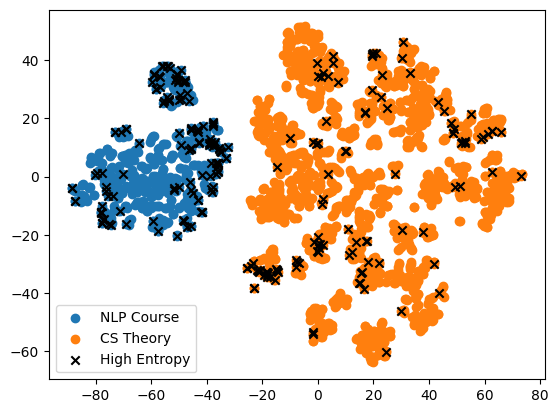

In [47]:
plt.scatter(all_vectors_tsne[:len(nlp_embeddings), 0], all_vectors_tsne[:len(nlp_embeddings), 1], label="NLP Course")
plt.scatter(all_vectors_tsne[len(nlp_embeddings):, 0], all_vectors_tsne[len(nlp_embeddings):, 1], label="CS Theory")
plt.scatter(all_vectors_tsne[df['high_entropy'] == 1, 0], all_vectors_tsne[df['high_entropy'] == 1, 1], label="High Entropy", color="black", marker="x")
plt.legend()
plt.show()

Houveram muitos chunks com alta entropia

## Centroids

In [48]:
nlp_centroid = np.mean(nlp_embeddings, axis=0)
cs_centroid = np.mean(cs_embeddings, axis=0)

In [49]:
nlp_centroid.shape, cs_centroid.shape

((1024,), (1024,))

In [50]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    return dot_product / (norm_vec1 * norm_vec2)

### Chunks mais próximos ao centroid do curso de NLP

In [51]:
nlp_similarities = [cosine_similarity(embedding, nlp_centroid) for embedding in nlp_embeddings]

nlp_most_related_indices = np.argsort(nlp_similarities)[::-1]

nlp_top_chunks = [nlp_chunks[i].page_content for i in nlp_most_related_indices[:5]]

for i, chunk in enumerate(nlp_top_chunks, 1):
    print(f"Chunk {i}:\n{chunk}")
    print(F"Similarity: {nlp_similarities[nlp_most_related_indices[i-1]]}\n")

Chunk 1:
and feed them into a classifier and so we can we can basically take a labeled data set of part of speech instances treat each position in every sentence as a example and feed that and train on that and produce a classifier all right so what goes wrong the the kind of problem is that we're not making use of the output structure at all so for example we had different possibilities for raises and interest rates right and it turns out that some of the edges that we kind of considered here are not good like for example we're not typically going to have a plural noun followed by a noun we're also not typically going to have a vbz followed by a vp of vbp and so the the predictions of a classifier may be incoherent uh meaning kind of locally each prediction looks reasonable right but the overall structure doesn't kind of add up to be the thing that we want and so this is going to lead us into our idea of sequence modeling and we're going to think about two models hidden markov models 

### Chunks mais próximos dos centroid das aulas de Teoria da Computação

In [52]:
cs_similarities = [cosine_similarity(embedding, cs_centroid) for embedding in cs_embeddings]

cs_most_related_indices = np.argsort(cs_similarities)[::-1]

cs_top_chunks = [cs_theory_chunks[i].page_content for i in cs_most_related_indices[:5]]

for i, chunk in enumerate(cs_top_chunks, 1):
    print(f"Chunk {i}:\n{chunk}")
    print(F"Similarity: {cs_similarities[cs_most_related_indices[i-1]]}\n")

Chunk 1:
potentially the case that like this equals by su you know like sometimes at least sometimes um [Music] oh yeah rather maybe not sometimes but like i better say for some neighbors b yeah i guess we want a condition on like whether the bit that was flipped in [Music] going from u to v is in s and then that's how you get the size of s involved yeah exactly so like you'll see indeed like if um you know v and u differ on coordinate i that's ins then what goes inside the brackets uh negation of right you're getting like minus phi s u else like if i is like not an s you're kind of counting plus phi s u yeah nice yeah so the average well the average i guess maybe c is like i mean the key is that it'll be like some multiple of phi s u indeed as you say maybe depending on the size of s and that's good like that's the kind of thing we're seeing where like you know k uh where's my thing k a phi s is value a string u was like some multiple of like phi s u that's what you want for eigen vec

In [53]:
nlp_embeddings.shape

(537, 1024)

In [54]:
nlp_centroid.shape

(1024,)

In [55]:
all_vectors = np.concatenate([nlp_embeddings, cs_embeddings], axis=0)
all_vectors = np.concatenate([all_vectors, nlp_centroid.reshape(1, -1), cs_centroid.reshape(1, -1)], axis=0)

In [66]:
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(all_vectors)

nlp_reduced = reduced_vectors[:len(nlp_embeddings)]
cs_reduced = reduced_vectors[len(nlp_embeddings):-2]
nlp_centroid_reduced, cs_centroid_reduced = reduced_vectors[-2:]

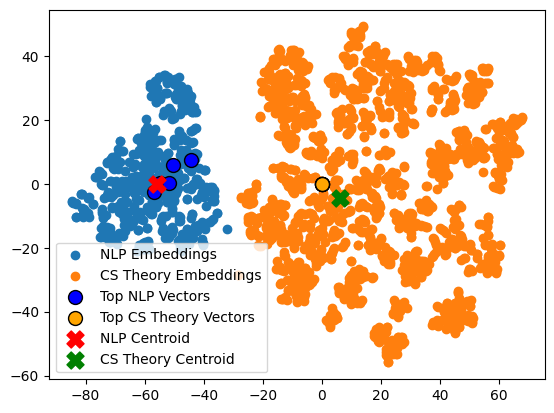

In [67]:
nlp_most_similar = nlp_reduced[nlp_most_related_indices[:5]]

corrected_cs_most_indices = []

for idx in cs_most_related_indices[:5]:
    # Precisei corrigir os índices porque os índices do CS começam depois dos índices do NLP
    corrected_cs_most_indices.append(idx + len(nlp_embeddings))

cs_most_similar = all_vectors[corrected_cs_most_indices]

plt.scatter(nlp_reduced[:, 0], nlp_reduced[:, 1], label="NLP Embeddings")
plt.scatter(cs_reduced[:, 0], cs_reduced[:, 1], label="CS Theory Embeddings")

plt.scatter(nlp_most_similar[:, 0], nlp_most_similar[:, 1], color='blue', edgecolor='black', s=100, label="Top NLP Vectors")
plt.scatter(cs_most_similar[:, 0], cs_most_similar[:, 1], color='orange', edgecolor='black', s=100, label="Top CS Theory Vectors")

plt.scatter(*nlp_centroid_reduced, color='red', label="NLP Centroid", s=150, marker="X")
plt.scatter(*cs_centroid_reduced, color='green', label="CS Theory Centroid", s=150, marker="X")

plt.legend()
plt.show()

## Keywords (tentativa)

In [58]:
high_entropy_texts = df[df['high_entropy'] == True].text
high_entropy_texts

1       to take these systems and apply them to real w...
9       is a verb this is a sort of unused unusual usa...
15      is that we've got a set of points this is goin...
31      vector all right we come to the second example...
32      that here we again screw up this first one um ...
                              ...                        
1946    can talk easily about another concept it's jus...
1985    sketch let's assume for a contradiction that t...
2061    what this learning parodies with noise problem...
2121    ideas by the time dinner approve or theorem uh...
2127    operation increases the badness so you're gonn...
Name: text, Length: 238, dtype: object

In [59]:
from rake_nltk import Rake

rake = Rake()

In [60]:
keywords_list = []

for text in high_entropy_texts:
    rake.extract_keywords_from_text(text)
    keywords = rake.get_ranked_phrases() 
    keywords_list.append(keywords[:5])

In [61]:
keywords_list

[['q times k transpose',
  'parameter matrices wq wk',
  'formula involves q k',
  'one extra little step',
  'uh inner products'],
 ['third example iraqi head seeks arms actually',
  'higher level syntactic one',
  'new dancing taking place',
  'last example like',
  'unused unusual usage'],
 ['linear binary classification um one thing',
  'break ties somehow right',
  'uh academic papers um',
  'weight vector w um',
  'weight vector leads'],
 ['get 1 1 minus 1 minus 1',
  '0 1 minus 1 minus 1',
  '0 0 minus 1 minus 1',
  'minus one uh',
  'second else line'],
 ['plus 1 minus 1 minus 1 plus 1',
  'one zero zero zero one zero one zero one',
  'get 1 1 minus 1 minus 1',
  'feature spaces look like um',
  'zero one one'],
 ['minus w transpose f x thing um taking',
  'essentially scalars w times times f',
  'loss function plus stochastic gradient descent',
  'particular weight w uh gives',
  'w transpose f'],
 ['minus w transpose f x thing um taking',
  'essentially scalars w times times 

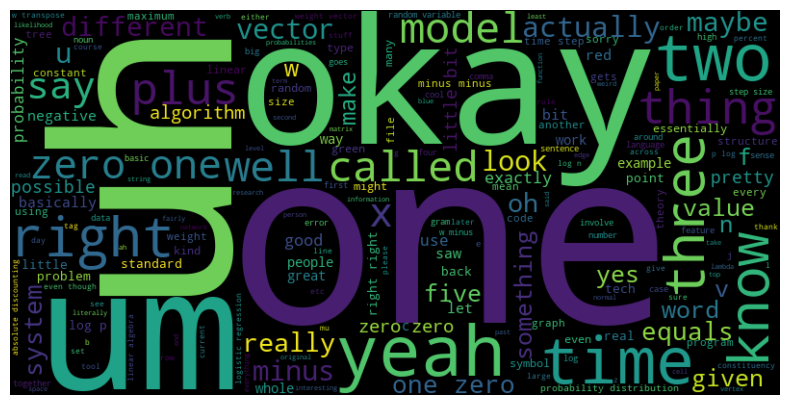

In [62]:
from wordcloud import WordCloud

# Combine todas as palavras-chave em uma única string
all_keywords = ' '.join([' '.join(keywords) for keywords in keywords_list])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(all_keywords)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()